In [3]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# define the path to the data folder
data_path = 'C:/Users/jithu/Desktop/pde4434/TEST'

# load the data from the folder
data = ''
for filename in os.listdir(data_path):
    if filename.endswith('.txt'):
        with open(os.path.join(data_path, filename), 'r') as f:
            text = f.read()
            data += text

# create a mapping from characters to integers
chars = sorted(list(set(data)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
num_chars = len(chars)

# convert the data to a numerical representation
data_as_int = [char_to_int[char] for char in data]

# define the input sequence
X = data_as_int[:-1]
# define the output sequence
y = data_as_int[1:]

# one-hot encode the output sequence
y = np.eye(num_chars)[y]

# reshape the input sequence to be 3-dimensional
X = np.reshape(X, (len(X), 1, 1))

# define the model
model = Sequential()
model.add(SimpleRNN(units=128, input_shape=(1, 1)))
model.add(Dense(num_chars, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', run_eagerly=True)

# train the model
model.fit(X, y, epochs=100, batch_size=128)

# save the model
model.save('my_model.h5')


Epoch 1/100


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

Found 12 images belonging to 3 classes.
Epoch 1/10
4/4 [==============================] - 8s 1s/step - loss: 82.3961 - accuracy: 0.2500
Epoch 2/10
4/4 [==============================] - 6s 1s/step - loss: 19.0232 - accuracy: 0.4167
Epoch 3/10
4/4 [==============================] - 6s 1s/step - loss: 5.6196 - accuracy: 0.2500
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 1.3231 - accuracy: 0.5833
Epoch 5/10
4/4 [==============================] - 6s 1s/step - loss: 0.7399 - accuracy: 0.7500
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 0.4843 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 6s 1s/step - loss: 0.1729 - accuracy: 0.9167
Epoch 8/10
4/4 [==============================] - 5s 1s/step - loss: 0.5597 - accuracy: 0.8333
Epoch 9/10
4/4 [==============================] - 5s 1s/step - loss: 0.6368 - accuracy: 0.8333
Epoch 10/10
4/4 [==============================] - 6s 1s/step - loss: 0.2197 - accuracy: 0.9167


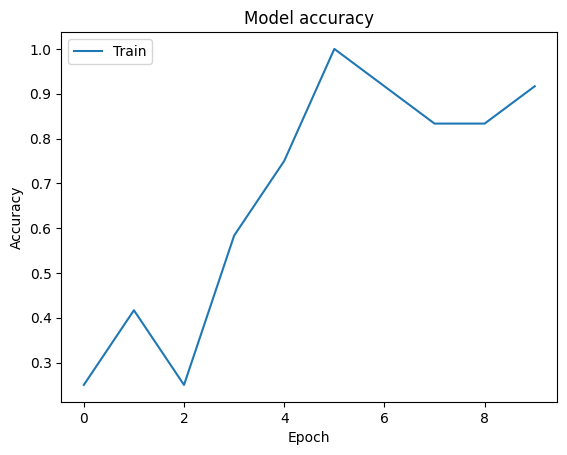

In [5]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Set the path to the directory containing the image data
data_dir = 'C:/Users/jithu/Desktop/pde4434/TEST'

# Set the batch size and image dimensions
batch_size = 3
img_height = 224
img_width = 224

# Define the data generator
datagen = ImageDataGenerator(rescale=1./255)

# Create the data generator from the directory
train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=10,
        verbose=1)

# Plot the training history
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Save the model to a file
model.save('C:/Users/jithu/Desktop/pde4434/y_model.h5')
